In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('D:\\Ultimate Programming\\Data Bases\\Machine Learning Datasets\\Customer Churn Prediction.xlsx')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [3]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df['TotalCharges'].mean()

np.float64(2283.3004408418656)

In [5]:
df['TotalCharges'] = df['TotalCharges'].fillna(2283.31)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300456
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

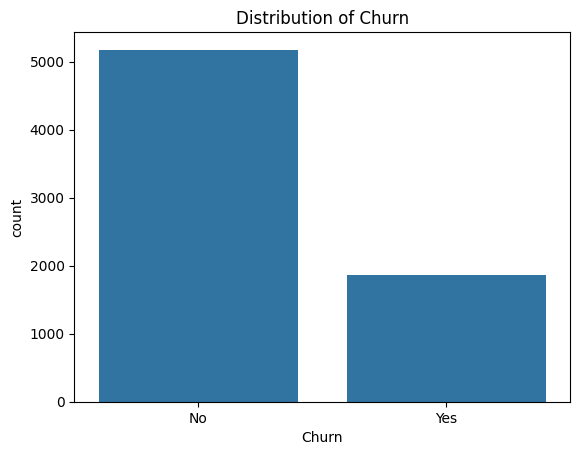

In [7]:
# Distribution of target variable
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

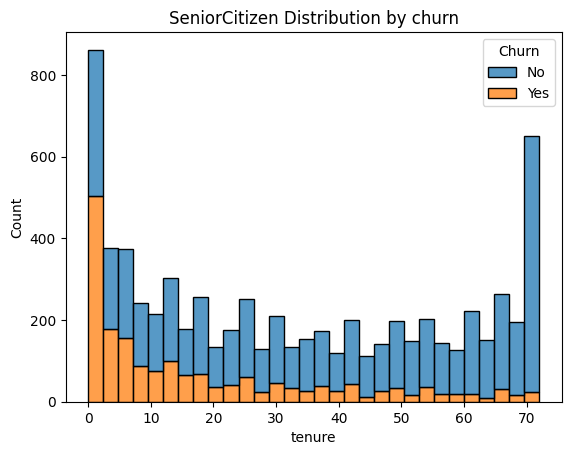

In [8]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('SeniorCitizen Distribution by churn')
plt.show()

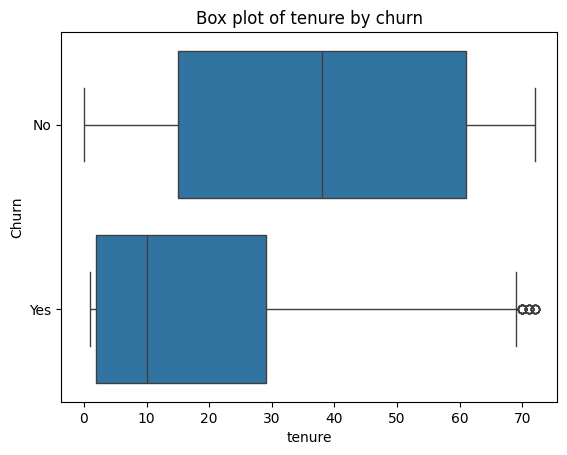

In [9]:
sns.boxplot(data=df, x='tenure', y='Churn')
plt.title('Box plot of tenure by churn')
plt.show()

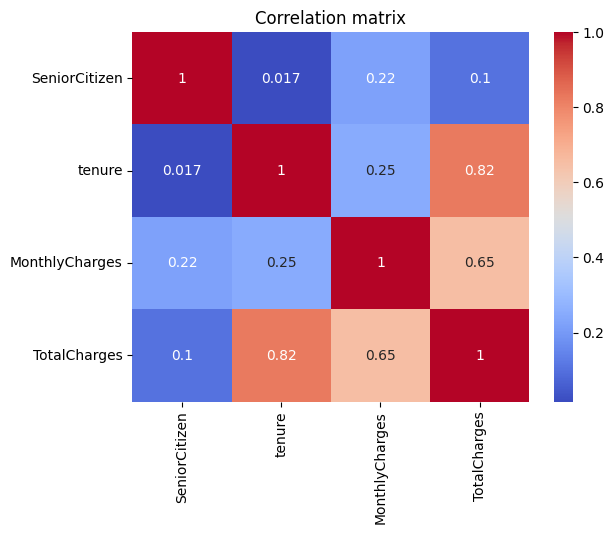

In [10]:
# Correlation matrix
num_cols = list()
for col in df.columns:
    if(df[col].dtype != object):
        num_cols.append(col)
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [11]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  
2      Mailed check          53.85        108.15    Yes  

[3 rows x 21 columns]

# Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Preprocessing - Label Encoding
label_encoders = {}
categorical_columns = [
    'gender', 'InternetService', 'DeviceProtection', 'PhoneService',
    'Partner', 'Dependents', 'MultipleLines', 'PaymentMethod',
    'PaperlessBilling', 'Contract', 'TechSupport', 'StreamingMovies','OnlineBackup',
    'StreamingTV','OnlineSecurity'
]
for col in categorical_columns: 
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
x = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
print(df.dtypes) 

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [14]:
x.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
1                 0              3           56.95       1889.50  
2                 1              3           53.85        108.15  
3                 0              0           42.30       1840.75  
4                 1              2           70.70        151.65

In [15]:
# Split Data into Training & Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [16]:
# Feature Scaling (Only for numeric features)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Verify the shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (4930, 19), y_train shape: (4930,)
x_test shape: (2113, 19), y_test shape: (2113,)


In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [18]:
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 79.79

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1560
         Yes       0.63      0.54      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



# Model Using KNN Algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [30]:
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy*100:.2f}')
print('\nK-Nearest Neighbors Classification Report:')
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 75.25

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.85      0.83      1560
         Yes       0.53      0.49      0.51       553

    accuracy                           0.75      2113
   macro avg       0.68      0.67      0.67      2113
weighted avg       0.75      0.75      0.75      2113



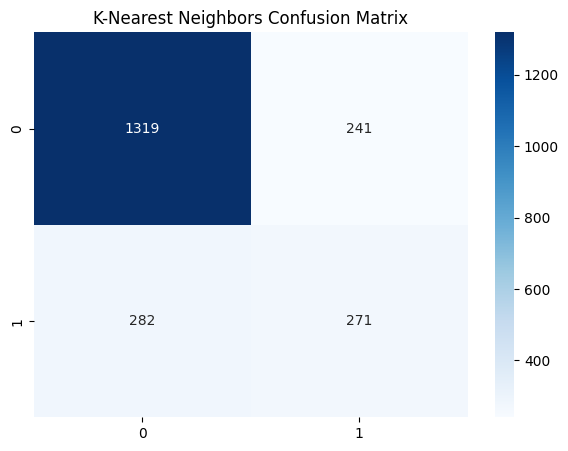

In [31]:
# Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

# Model Using Decision Tree Algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Decision Tree

decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
decision_pred = decision.predict(x_test)
decision_accuracy = accuracy_score(y_test, decision_pred)

In [35]:
# Display accuracy & performance
print(f'Decision Tree Accuracy: {knn_accuracy*100:.2f}')
print('\nDecision Tree Classification Report:')
print(classification_report(y_test, decision_pred))

Decision Tree Accuracy: 75.25

Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.81      0.82      1560
         Yes       0.48      0.51      0.50       553

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



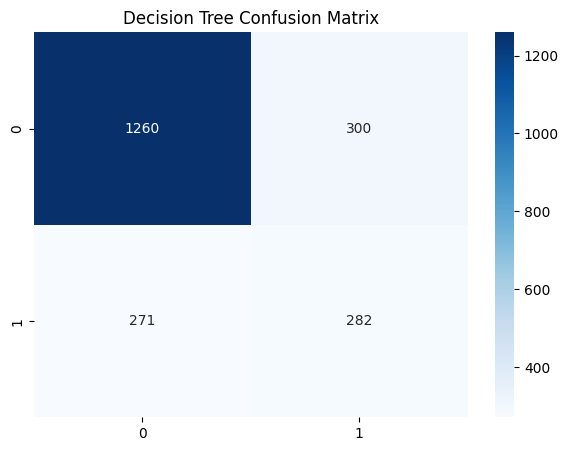

In [36]:
# Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, decision_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Model Using vector machine algorithm

In [37]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [38]:
# Display accuracy & performance
print(f'Vector Machine Algorithm Accuracy: {knn_accuracy*100:.2f}')
print('\nVector Machine Algorithm Classification Report:')
print(classification_report(y_test, svm_pred))

Vector Machine Algorithm Accuracy: 75.25

Vector Machine Algorithm Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1560
         Yes       0.66      0.47      0.55       553

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113

